In [25]:
import sys
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from train import twoHiddenNet
from utils.img_to_vec import Img2Vec

import os
import cv2

In [26]:
MODEL_PATH = "../model/age_est_model.pt"

In [33]:
def get_feats(image_path):
    fe = Img2Vec(cuda=False)  # change this if you use Cuda version of the PyTorch.
    img = Image.open(image_path)
    
    # The model could only handle 3-channel images, so we convert 1-channel image to 3-channel image
    channels = img.split()
    if len(channels) == 1:
        img = Image.merge('RGB', (channels[0], channels[0], channels[0]))
    
    img = img.resize((224, 224))
    feats = fe.get_vec(img).reshape(1, -1)
    return feats

In [34]:
def get_model():
    model = twoHiddenNet()
    model.load_state_dict(torch.load(MODEL_PATH))
    return model

In [35]:
def estimate_age_from_image(image_path):

    image_feats = get_feats(image_path)
    
    
    
    
    model = get_model()
    estimated_age = model(Variable(torch.from_numpy(image_feats).float()))
    return estimated_age.data.cpu().numpy()[0][0]

In [36]:
def parse_age(image_name):
    '''
    example: 23300_1962-06-19_2011.jpg
    the calculation: age=2011-1962=49
    return 49
    '''
    tokens1 = image_name.split('.')
    tokens2 = tokens1[0].split('_')
    tokens3 = tokens2[1].split('-')
    dob = int(tokens3[0])
    photo = int(tokens2[2])
    return photo-dob

In [39]:
def test(test_data_path):
    difs_by_age = {}
    folders = os.listdir(test_data_path)
    for folder in folders:
        images = os.listdir(test_data_path+folder)
        print('working on folder ', folder, ', ', len(images), ' images to be tested')
        for image in images:
            try:
                
                age_est = estimate_age_from_image(test_data_path+folder+'/'+image)
                age_ref = parse_age(image)
                if not age_ref in difs_by_age:
                    difs_by_age[age_ref] = []
                dif = abs(age_est - age_ref)
                difs_by_age[age_ref].append(dif)
            except Exception as e:
                print('Exception caught on path ', folder+'/'+image)
                raise e
    return difs_by_age
        

In [40]:
difs_by_age = test('/home/dongwenjian/Jupyter/DeepLearningWithPyTorch/projet/data2/wiki_crop_test/')

working on folder  69 ,  14  images to be tested


/home/dongwenjian/anaconda3/lib/python3.6/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")
/home/dongwenjian/Jupyter/DeepLearningWithPyTorch/projet/GitHub/age-estimation/src/train.py:22: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.layer1.weight)
/home/dongwenjian/Jupyter/DeepLearningWithPyTorch/projet/GitHub/age-estimation/src/train.py:25: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.layer2.weight)
/home/dongwenjian/Jupyter/DeepLearningWithPyTorch/projet/GitHub/age-estimation/src/train.py:28: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.layer3.weight)


working on folder  27 ,  89  images to be tested
working on folder  41 ,  46  images to be tested
working on folder  62 ,  19  images to be tested
working on folder  50 ,  18  images to be tested
working on folder  73 ,  6  images to be tested
working on folder  71 ,  12  images to be tested
working on folder  74 ,  3  images to be tested
working on folder  47 ,  29  images to be tested
working on folder  39 ,  27  images to be tested
working on folder  91 ,  5  images to be tested
working on folder  29 ,  85  images to be tested
working on folder  100 ,  0  images to be tested
working on folder  70 ,  12  images to be tested
working on folder  66 ,  16  images to be tested
working on folder  20 ,  63  images to be tested
working on folder  7 ,  0  images to be tested
working on folder  81 ,  4  images to be tested
working on folder  54 ,  21  images to be tested
working on folder  48 ,  17  images to be tested
working on folder  40 ,  33  images to be tested
working on folder  14 ,  4

In [42]:
n = 101
diffs = np.zeros((n,))
for key in difs_by_age:
    diffs[key] = np.mean(difs_by_age[key])

Text(0.5, 1.0, 'model of cetinsamet tested on our test data')

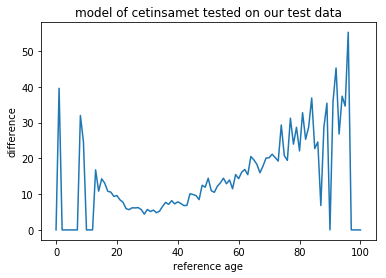

In [46]:
import matplotlib.pyplot as plt
plt.plot(diffs)
plt.xlabel('reference age')
plt.ylabel('difference')
plt.title('model of cetinsamet tested on our test data')